In [53]:
%load_ext autoreload
%autoreload 2

from owain_app.catalog import Catalog
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import jsonlines

catalog = Catalog()
responses = catalog.load_processed_icl_responses()

2023-11-30 17:12:39.821 | INFO     | owain_app.catalog:_load_jsonl:73 - Loading ProcessedICLPromptResponse instances from /Users/gabe/notes/Career/job_applications/Astra_Fellowship/owain_app/data/processed_icl_responses/processed_icl_responses.jsonl


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
data = pd.DataFrame([x.model_dump() for x in responses])
data.dtypes

string_length         int64
notation_type        object
train_rule_names     object
train_examples       object
train_labels         object
test_example         object
test_label          float64
prompt               object
prediction           object
model                object
split                object
dtype: object

In [55]:
data['train_rule_names_str'] = data['train_rule_names'].apply(lambda x: ','.join(x))
# data['test_label'] = data['test_label'].astype(int)

In [56]:
val_predictions = data[data.split == 'val']
val_predictions['test_label'] = val_predictions['test_label'].astype(int)
val_predictions['prediction'] = val_predictions['prediction'].astype(int)

val_predictions_by_rule = val_predictions.groupby('train_rule_names_str')


val_accuracy_scores = val_predictions_by_rule.agg({'test_label': list, 'prediction': list}).apply(lambda x: accuracy_score(x.test_label, x.prediction), axis=1).sort_values(ascending=False)

/var/folders/b_/8s655bvn3bqfj_qkwfxmfdwm0000gn/T/ipykernel_34120/2789609807.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_predictions['test_label'] = val_predictions['test_label'].astype(int)
/var/folders/b_/8s655bvn3bqfj_qkwfxmfdwm0000gn/T/ipykernel_34120/2789609807.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_predictions['prediction'] = val_predictions['prediction'].astype(int)


In [57]:
val_accuracy_scores

train_rule_names_str
rule0,rule1    1.00
rule0,rule2    1.00
rule0,rule3    1.00
rule0,rule4    1.00
rule1,rule2    1.00
rule1,rule3    1.00
rule1,rule4    1.00
rule2,rule3    1.00
rule3,rule4    1.00
rule2,rule4    0.75
dtype: float64

In [58]:
test_predictions = data[data.split == 'test'].copy()

In [59]:
test_predictions

from owain_app.create_tasks import get_all_rules, apply_rules
from owain_app.create_articulation_prompts import format_rule
import itertools
from itertools import combinations

min_rules_per_answer = 1

def apply_rules_evaluation(s, rules):
    if all([r(s) for r in rules]):
        return 1
    # elif all([(not r(s)) for r in rules]):
    #     return 0
    else:
        return 0


all_rules = get_all_rules(string_length=5)
all_rule_combinations = list(
    itertools.chain.from_iterable(
        combinations(all_rules, r)
        for r in range(min_rules_per_answer, 3)
    )
)


rule_combination_columns = []
for rule_combination in all_rule_combinations:
    rule_combination_str = ' and '.join([format_rule(x.rule_name) for x in rule_combination])
    rule_combination_columns.append(rule_combination_str)
    test_predictions[rule_combination_str] = test_predictions["test_example"].apply(lambda x: apply_rules_evaluation(x, rule_combination))

In [60]:
def notna_accuracy_score(y_true, y_pred):
    return accuracy_score(y_true[y_true.notna() & y_pred.notna()], y_pred[y_true.notna() & y_pred.notna()])

In [61]:
df

,string_length,notation_type,train_rule_names,train_examples,train_labels,test_example,test_label,prompt,prediction,model,...,x0 == 1 and x1 == 1,x0 == 1 and x2 == 1,x0 == 1 and x3 == 1,x0 == 1 and x4 == 1,x1 == 1 and x2 == 1,x1 == 1 and x3 == 1,x1 == 1 and x4 == 1,x2 == 1 and x3 == 1,x2 == 1 and x4 == 1,x3 == 1 and x4 == 1
150,5,string,"[rule3, rule4]","[11011, 10111, 10000, 10011, 00100, 11111, 010...","[1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0]",00110,NaN,Classify the unlabeled example from the labele...,0,gpt-4,...,0.0,NaN,NaN,0.0,NaN,NaN,0.0,1.0,NaN,NaN
160,5,string,"[rule3, rule4]","[11011, 10111, 10000, 10011, 00100, 11111, 010...","[1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0]",00101,NaN,Classify the unlabeled example from the labele...,0,gpt-4,...,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN
164,5,string,"[rule3, rule4]","[11011, 10111, 10000, 10011, 00100, 11111, 010...","[1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0]",10101,NaN,Classify the unlabeled example from the labele...,1,gpt-4,...,NaN,1.0,NaN,1.0,NaN,0.0,NaN,NaN,1.0,NaN
167,5,string,"[rule3, rule4]","[11011, 10111, 10000, 10011, 00100, 11111, 010...","[1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0]",01101,NaN,Classify the unlabeled example from the labele...,1,gpt-4,...,NaN,NaN,0.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN
170,5,string,"[rule3, rule4]","[11011, 10111, 10000, 10011, 00100, 11111, 010...","[1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0]",11110,NaN,Classify the unlabeled example from the labele...,1,gpt-4,...,1.0,1.0,1.0,NaN,1.0,1.0,NaN,1.0,NaN,NaN
178,5,string,"[rule3, rule4]","[11011, 10111, 10000, 10011, 00100, 11111, 010...","[1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0]",11101,NaN,Classify the unlabeled example from the labele...,1,gpt-4,...,1.0,1.0,NaN,1.0,1.0,NaN,1.0,NaN,1.0,NaN
181,5,string,"[rule3, rule4]","[11011, 10111, 10000, 10011, 00100, 11111, 010...","[1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0]",11001,NaN,Classify the unlabeled example from the labele...,1,gpt-4,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,0.0,NaN,NaN
182,5,string,"[rule3, rule4]","[11011, 10111, 10000, 10011, 00100, 11111, 010...","[1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0]",01010,NaN,Classify the unlabeled example from the labele...,0,gpt-4,...,NaN,0.0,NaN,0.0,NaN,1.0,NaN,NaN,0.0,NaN
183,5,string,"[rule3, rule4]","[11011, 10111, 10000, 10011, 00100, 11111, 010...","[1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0]",01110,NaN,Classify the unlabeled example from the labele...,1,gpt-4,...,NaN,NaN,NaN,0.0,1.0,1.0,NaN,1.0,NaN,NaN
186,5,string,"[rule3, rule4]","[11011, 10111, 10000, 10011, 00100, 11111, 010...","[1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0]",10010,NaN,Classify the unlabeled example from the labele...,0,gpt-4,...,NaN,NaN,1.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN


In [67]:
rule_accuracies_all = []
for train_rule, df in test_predictions.groupby('train_rule_names_str'):
    rule_accuracies = df[rule_combination_columns].apply(lambda x: notna_accuracy_score(x, df['prediction'].astype(int)), axis=0)
    # print(.sort_values(ascending=False))
    # print()
    d = {"train_rule_names_str": train_rule}
    d.update(rule_accuracies) 
    rule_accuracies_all.append(
        d
    )

In [69]:
rule_accuracies_all = pd.DataFrame(rule_accuracies_all)

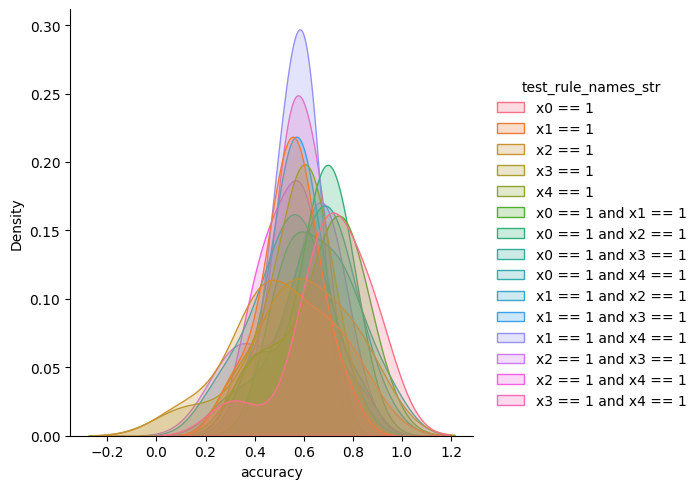

In [76]:
import seaborn as sns

df = rule_accuracies_all.melt(id_vars=['train_rule_names_str'], value_vars=rule_combination_columns, var_name='test_rule_names_str', value_name='accuracy')

overlaid = sns.displot(df, x="accuracy", hue="test_rule_names_str", kind="kde", fill=True)


In [ ]:
import matplotlib.pyplot as plt
plt.clf()

overlaid.savefig("test_accuracy_distribution_by_rule.png")

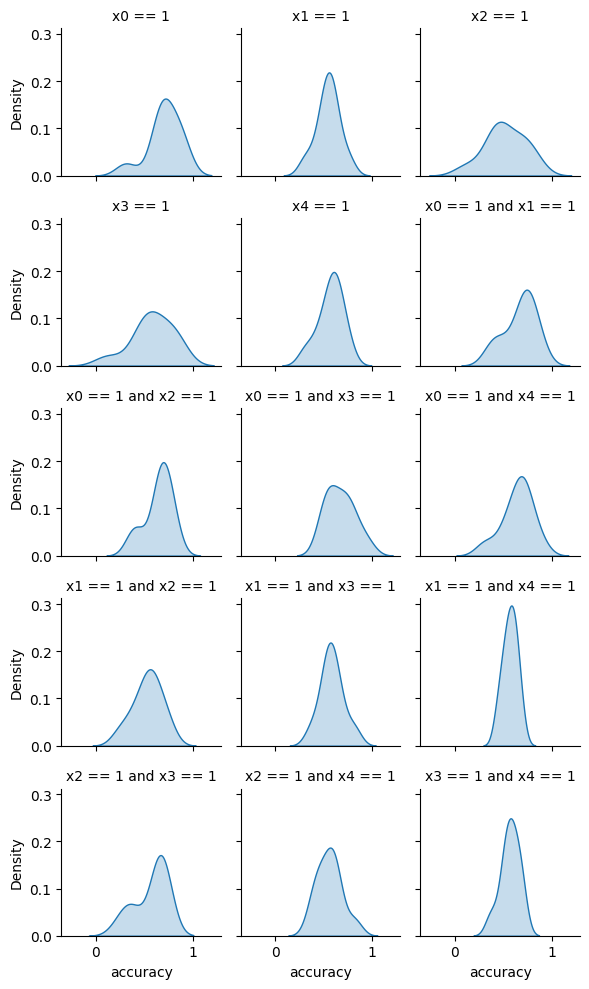

In [80]:
stacked = sns.displot(df, x="accuracy", col="test_rule_names_str", col_wrap=3, kind="kde", fill=True, height=2)
stacked.set_titles("{col_name}")
stacked.fig.suptitle("Accuracy distribution by test rule")


In [ ]:
def get_feature_columns(predictions_df):
    columns = [
        f"x{i+1}" for i in range(0, len(predictions_df["test_example"].values[0]))
    ]
    return columns


def normalize_predictions(data):
    responses = pd.json_normalize(data["response"])
    choices = pd.json_normalize(responses["choices"].apply(lambda x: x[0]))
    predictions = (
        choices["message.content"].map({"True": "1", "False": "0"}).rename("prediction")
    )
    return predictions


def normalize_prompt(data):
    return pd.json_normalize(data["prompt"])


def get_train_correlations(predictions_df):
    "A sanity check to see which features are correlated with the label in the training set"
    train_df = pd.DataFrame(predictions_df["train_examples"][0])
    train_df_ = pd.DataFrame(
        train_df[0].apply(lambda x: list(x)).values.tolist(),
        columns=["x1", "x2", "x3", "x4"],
    )
    train_df_["label"] = train_df[1].map({True: "1", False: "0"})
    train_correlations = train_df_.corr()["label"].round(2).sort_values(ascending=False)

    return train_correlations

def compute_val_accuracy(predictions_df):
    val_accuracy_n = len(predictions_df[predictions_df.split == "val"])

    val_accuracy_score = accuracy_score(
        predictions_df[predictions_df.split == "val"]["label"],
        predictions_df[predictions_df.split == "val"]["message.content"],
    )
    return val_accuracy_score, val_accuracy_n

def compute_accuracy_and_learned_rules():
    # read the data
    data_path = catalog.data_path / "model_responses_icl/n=4/rule0_and_rule1/all.jsonl"
    with jsonlines.open(data_path) as reader:
        data = [obj for obj in reader]

    # convert to dataframe
    data = pd.DataFrame(data, columns=["input", "response", "prompt"])

    predictions = normalize_predictions(data)
    prompt = normalize_prompt(data)

    predictions_df = pd.concat([prompt, predictions], axis=1)
    predictions_df["label"] = predictions_df["label"].map(
        {True: "1", False: "0", None: np.nan}
    )
    
    train_correlations = get_train_correlations(predictions_df)

    features = pd.DataFrame(
        predictions_df["test_example"].apply(lambda x: list(x)).values.tolist(),
        columns=columns,
    )

    columns = get_feature_columns(predictions_df)

    predictions_df_cat = pd.concat([features, predictions_df["message.content"]], axis=1)

    # get correlations between features and predictions
    feature_correlations = predictions_df_cat.corr()["prediction"].round(2).sort_values(ascending=False)

    
    val_accuracy_score, val_accuracy_n = compute_val_accuracy(predictions_df)

    return {
        "val_accuracy_score": val_accuracy_score,
        "val_accuracy_n": val_accuracy_n,
        "feature_correlations": feature_correlations,
        "train_correlations": train_correlations,
    }